<a href="https://colab.research.google.com/github/Sylvesterchuks/Airbnb_Data/blob/main/Regression_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets --upgrade

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: okaforchukwuka
Your Kaggle Key: ··········


100%|██████████| 2.44M/2.44M [00:00<00:00, 121MB/s]

In [3]:
data = '/content/new-york-city-airbnb-open-data/AB_NYC_2019.csv'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
price_log = np.log1p(df.price)

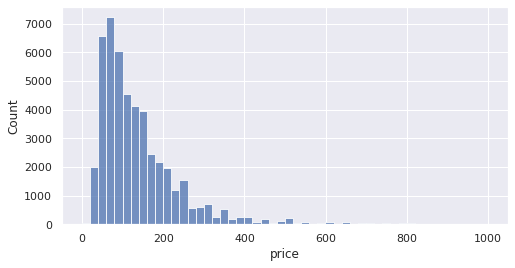

In [85]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.histplot(df.price[df['price'] < 1000],bins=50)

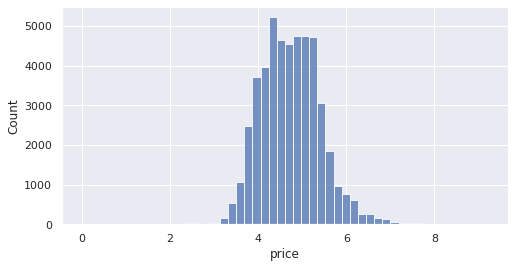

In [86]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.histplot(price_log,bins=50)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [23]:
df.shape

(48895, 16)

In [24]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
features = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [55]:
features.remove('price')

# Question 1

In [25]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
np.sum(df[features].isnull().sum())

10052

In [27]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Question 2

In [87]:
df.minimum_nights.median() 

3.0

In [43]:
idx = np.arange(df.shape[0])

In [44]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [45]:
n = df.shape[0]

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

print(n, n_train, n_val, n_test)

48895 29337 9779 9779


In [38]:
idx.shape

(48895,)

In [63]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [64]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [65]:
df_train.drop('price',axis=1,inplace=True)
df_val.drop('price',axis=1,inplace=True)
df_test.drop('price',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Question 3

In [52]:
df_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,3,62,2019-01-02,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,2,17,2017-04-28,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,2,5,2019-06-02,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,2,30,2019-06-03,0.80,1,30


In [66]:
df_train[features].isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [53]:
def root_mean_sq_error(pred_v, actual_v):
  error_sq= (pred_v-actual_v)**2
  mean_sqd_error = error_sq.mean()
  rmse = np.sqrt(mean_sqd_error)
  return rmse

In [71]:
def train_linear_regression(X,y, r=0.001):
  ones = np.ones(X.shape[0])

  X = np.column_stack([ones,X])
  XTX = X.transpose().dot(X)
  
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [70]:
def prepare_X_new(df):
  df = df.copy()
    
  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values

  return X

In [67]:
X_train  = prepare_X_new(df_train)
w0, w = train_linear_regression(X_train, y_train)

# New Prediction using different dataset
X_val = prepare_X_new(df_val)
y_val_pred =  w0 + X_val.dot(w)

print(root_mean_sq_error( y_val_pred,y_val))

0.6430337788584176


# Question 4

In [74]:
rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in rs:
  # Fitting the model

  X_train  = prepare_X_new(df_train)
  w0, w = train_linear_regression(X_train, y_train, r=r)

  # New Prediction using different dataset
  X_val = prepare_X_new(df_val)
  y_val_pred =  w0 + X_val.dot(w)

  score = root_mean_sq_error( y_val_pred,y_val)
  print(r,w0,'Prediction: ', round(score,2))

0 -419.91265807142094 Prediction:  0.64
1e-06 -419.8627153336333 Prediction:  0.64
0.0001 -414.97649233703777 Prediction:  0.64
0.001 -375.27365241862066 Prediction:  0.64
0.01 -191.78384049339815 Prediction:  0.66
0.1 -32.56256054966786 Prediction:  0.68
1 -3.4992168354209157 Prediction:  0.68
5 -0.7033623171188026 Prediction:  0.68
10 -0.35127675921831375 Prediction:  0.68


# Question 5

In [75]:
def model(df,seed,rs):
  df = df.copy()

  idx = np.arange(df.shape[0])
  np.random.seed(seed)
  np.random.shuffle(idx)

  n = df.shape[0]
  n_test = int(n * 0.2)
  n_val = int(n * 0.2)
  n_train = n - n_test - n_val

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)

  df_train.drop('price',axis=1,inplace=True)
  df_val.drop('price',axis=1,inplace=True)
  df_test.drop('price',axis=1,inplace=True)

  for r in rs:
    # Fitting the model

    X_train  = prepare_X_new(df_train)
    w0, w = train_linear_regression(X_train, y_train, r=r)

    # New Prediction using different dataset
    X_val = prepare_X_new(df_val)
    y_val_pred =  w0 + X_val.dot(w)

    score = root_mean_sq_error( y_val_pred,y_val)
    return score

In [76]:
deviation = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
  deviation.append(model(df,s,rs))
std = np.std(deviation)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
print(round(std,3))

0.008


# Question 6

In [81]:
# Question 6


seed_9 = model(df,seed=9,rs=[0.001])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
print(round(seed_9,2))

0.64
